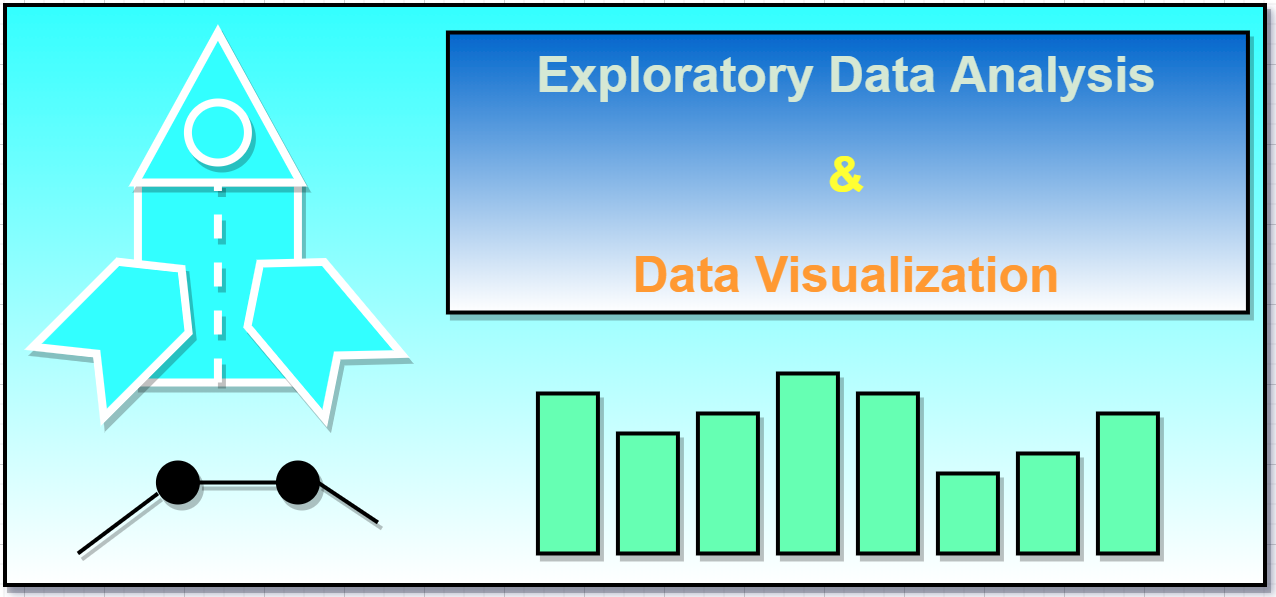

## What is Exploratory Data Analysis?

**Exploratory Data Analysis** or **(EDA)** is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Data Science. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

### Tips Dataset:
* total_bill   ---->  float64
* tip      ---->      float64
* sex      ---->     category
* smoker   ---->     category
* day      ---->     category
* time     ---->     category
* size     ---->        int64

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing the necessary libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
tips_data = sns.load_dataset('tips')

### Fetch first few data from dataset

In [4]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Description of the dataset

In [5]:
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Checking the DataType of each column

In [6]:
tips_data.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [7]:
tips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


Columns in DataFrame

In [8]:
tips_data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

#### Unique Values

In [9]:
print(tips_data.sex.unique())
print(tips_data.day.unique())
print(tips_data.time.unique())
print(tips_data.smoker.unique())

[Female, Male]
Categories (2, object): [Female, Male]
[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]
[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]
[No, Yes]
Categories (2, object): [No, Yes]


Shape of the DataFrame

In [10]:
tips_data.shape

(244, 7)

Checking for Null Values

In [11]:
tips_data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Checking the index value of the dataframe using iloc

In [12]:
tips_data.iloc[2]

total_bill     21.01
tip              3.5
sex             Male
smoker            No
day              Sun
time          Dinner
size               3
Name: 2, dtype: object

In [13]:
tips_data.iloc[[2, 4, 6]]

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
4,24.59,3.61,Female,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


In [14]:
tips_data.iloc[7:12]

,total_bill,tip,sex,smoker,day,time,size
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
10,10.27,1.71,Male,No,Sun,Dinner,2
11,35.26,5.00,Female,No,Sun,Dinner,4


In [15]:
#indexing the dataframe using .loc

#selecting the specific rows and column as user input(1-5 rows and 2nd and 4th cols)
tips_data.loc[1:5, ["sex", "smoker"]]

,sex,smoker
1,Male,No
2,Male,No
3,Male,No
4,Female,No
5,Male,No


Inter - Quantile Range (IQR - For Total Bill

In [16]:
Q1 = tips_data.total_bill.quantile(0.25)
Q3 = tips_data.total_bill.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

10.779999999999998


## Set DataFrame Visualization

Set Background Color & Font Color

In [17]:
tips_data.style.set_properties(**{'background-color': 'black', 
                           'color': 'green'})

Set background color for min value in column containing numbers

In [18]:
tips_data.style.highlight_min(axis=0)

,total_bill,tip,sex,smoker,day,time,size
0,16.990000,1.010000,Female,No,Sun,Dinner,2
1,10.340000,1.660000,Male,No,Sun,Dinner,3
2,21.010000,3.500000,Male,No,Sun,Dinner,3
3,23.680000,3.310000,Male,No,Sun,Dinner,2
4,24.590000,3.610000,Female,No,Sun,Dinner,4
5,25.290000,4.710000,Male,No,Sun,Dinner,4
6,8.770000,2.000000,Male,No,Sun,Dinner,2
7,26.880000,3.120000,Male,No,Sun,Dinner,4
8,15.040000,1.960000,Male,No,Sun,Dinner,2
9,14.780000,3.230000,Male,No,Sun,Dinner,2


Set background color for max value in column containing numbers

In [19]:
tips_data.style.highlight_max(axis=0)

,total_bill,tip,sex,smoker,day,time,size
0,16.990000,1.010000,Female,No,Sun,Dinner,2
1,10.340000,1.660000,Male,No,Sun,Dinner,3
2,21.010000,3.500000,Male,No,Sun,Dinner,3
3,23.680000,3.310000,Male,No,Sun,Dinner,2
4,24.590000,3.610000,Female,No,Sun,Dinner,4
5,25.290000,4.710000,Male,No,Sun,Dinner,4
6,8.770000,2.000000,Male,No,Sun,Dinner,2
7,26.880000,3.120000,Male,No,Sun,Dinner,4
8,15.040000,1.960000,Male,No,Sun,Dinner,2
9,14.780000,3.230000,Male,No,Sun,Dinner,2


using seaborn library

In [20]:
cm = sns.light_palette("green", as_cmap=True)
tips_data.style.background_gradient(cmap=cm)

,total_bill,tip,sex,smoker,day,time,size
0,16.990000,1.010000,Female,No,Sun,Dinner,2
1,10.340000,1.660000,Male,No,Sun,Dinner,3
2,21.010000,3.500000,Male,No,Sun,Dinner,3
3,23.680000,3.310000,Male,No,Sun,Dinner,2
4,24.590000,3.610000,Female,No,Sun,Dinner,4
5,25.290000,4.710000,Male,No,Sun,Dinner,4
6,8.770000,2.000000,Male,No,Sun,Dinner,2
7,26.880000,3.120000,Male,No,Sun,Dinner,4
8,15.040000,1.960000,Male,No,Sun,Dinner,2
9,14.780000,3.230000,Male,No,Sun,Dinner,2


In [21]:
tips_data.style.background_gradient(cmap=cm).highlight_min(axis=0, color='lightblue').highlight_max(axis=0, color='blue')

,total_bill,tip,sex,smoker,day,time,size
0,16.990000,1.010000,Female,No,Sun,Dinner,2
1,10.340000,1.660000,Male,No,Sun,Dinner,3
2,21.010000,3.500000,Male,No,Sun,Dinner,3
3,23.680000,3.310000,Male,No,Sun,Dinner,2
4,24.590000,3.610000,Female,No,Sun,Dinner,4
5,25.290000,4.710000,Male,No,Sun,Dinner,4
6,8.770000,2.000000,Male,No,Sun,Dinner,2
7,26.880000,3.120000,Male,No,Sun,Dinner,4
8,15.040000,1.960000,Male,No,Sun,Dinner,2
9,14.780000,3.230000,Male,No,Sun,Dinner,2


## Data Visualization

## Joint Plot:

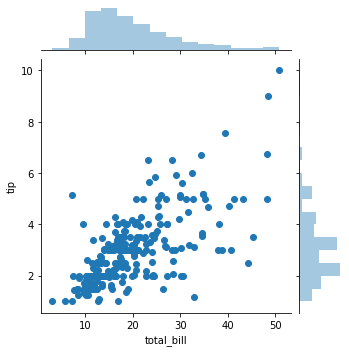

In [22]:
sns.jointplot(x="total_bill", y="tip", data=tips_data, size=5)

## Scatter Plot:

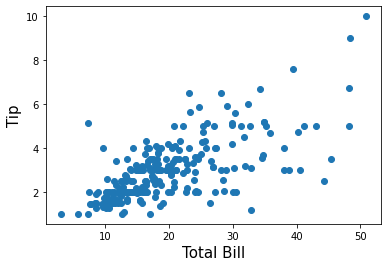

In [23]:
#Data
X = tips_data['total_bill']
Y = tips_data['tip']

#scattering the plot
plt.scatter(X, Y)

#define labels for axis
plt.xlabel('Total Bill', fontsize = 15)
plt.ylabel('Tip', fontsize = 15)

#show plot
plt.show()

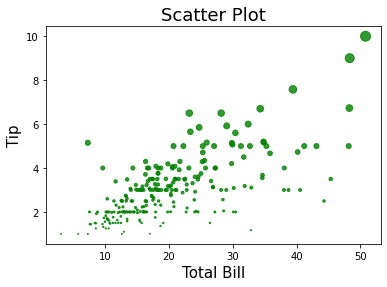

In [24]:
#data
X = tips_data['total_bill']
Y = tips_data['tip']

#scattering the plot
#s is the shape, c is the colour, aplha is for opacity(0 < alpha < 1)
plt.scatter(X, Y, s=np.array(Y)**2, c="green", alpha=0.8)

#title
plt.title('Scatter Plot', fontsize = 18)

#define labels for axis
plt.xlabel('Total Bill', fontsize = 15)
plt.ylabel('Tip', fontsize = 15)

#show plot
plt.show()

Scatter Plot using random colors

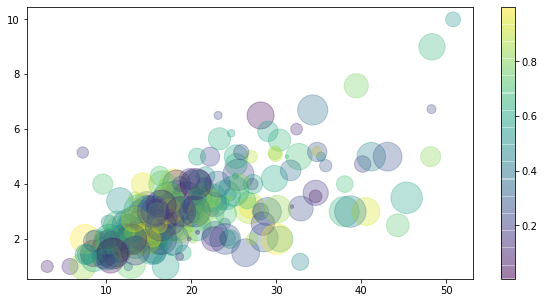

In [25]:
rng = np.random.RandomState(0)
colors = rng.rand(len(tips_data))
sizes = 1000 * rng.rand(len(tips_data))

plt.figure(figsize = (10, 5))
x = tips_data['total_bill']
y = tips_data['tip']
plt.scatter(x, y, c=colors[:], s=sizes, alpha=0.3,
                   cmap='viridis')
plt.colorbar();

## FacetGrid:

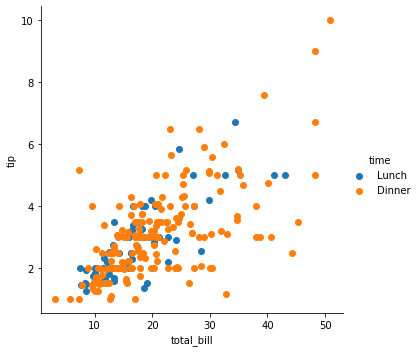

In [26]:
sns.FacetGrid(tips_data, hue="time", size=5) \
   .map(plt.scatter, "total_bill", "tip") \
   .add_legend()

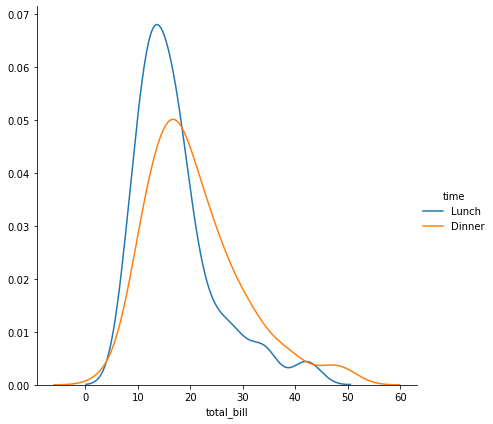

In [27]:
sns.FacetGrid(tips_data, hue="time", size=6) \
   .map(sns.kdeplot, "total_bill") \
   .add_legend()

## Hist Plot:

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

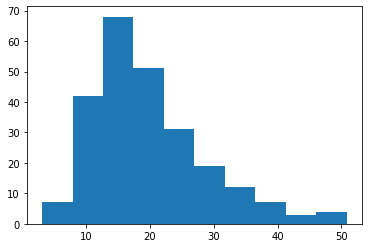

In [28]:
plt.hist(tips_data['total_bill'])

(array([41., 79., 66., 27., 19.,  5.,  4.,  1.,  1.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 1 Patch objects>)

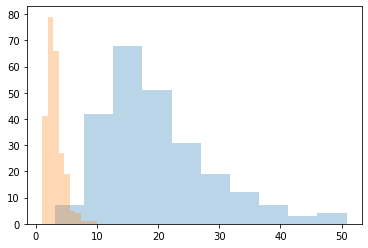

In [29]:
x1 = tips_data['total_bill']
x2 = tips_data['tip']
kwargs = dict(histtype='stepfilled', alpha=0.3)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)

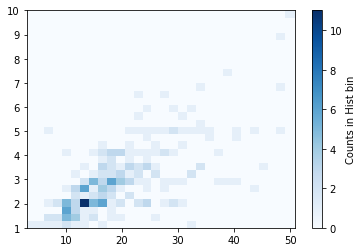

In [30]:
x = tips_data['total_bill']
y = tips_data['tip']
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('Counts in Hist bin')

## Sub Plot:

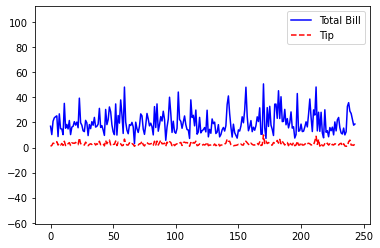

In [31]:
x = tips_data['total_bill']
y = tips_data['tip']
fig, ax = plt.subplots()
ax.plot(x, '-b', label='Total Bill')
ax.plot(y, '--r', label='Tip')
ax.axis('equal')
leg = ax.legend();

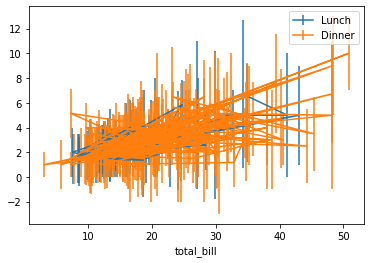

In [32]:
fig, ax = plt.subplots()

for key, group in tips_data.groupby('time'):
    group.plot('total_bill', 'tip', yerr='size', label=key, ax=ax)

plt.show()

## Bar Plot:

In [33]:
set(tips_data['smoker'])

{'No', 'Yes'}

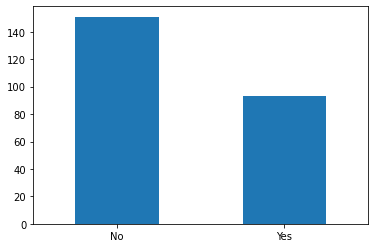

In [34]:
tips_data.smoker.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

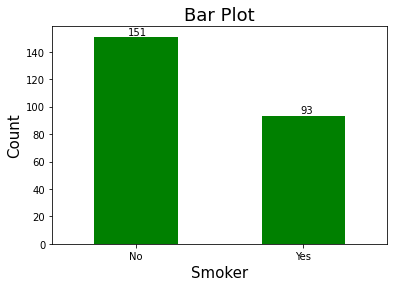

In [35]:
tips_data.smoker.value_counts().plot(kind="bar", rot=0, color="green")

plt.text(x = -0.05, y = tips_data.smoker.value_counts()[1]+1, s = tips_data.smoker.value_counts()[1])
plt.text(x = 0.98, y = tips_data.smoker.value_counts()[0]+2, s = tips_data.smoker.value_counts()[0])

#define the title & labels
plt.title("Bar Plot", fontsize = 18)
plt.xlabel("Smoker", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

plt.show()

### Value count of the day in dataset

In [36]:
tips_data.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

## Pie Chart:

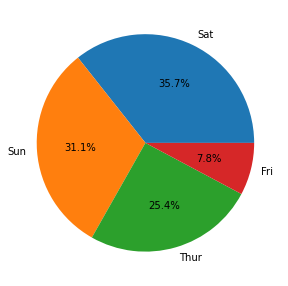

In [37]:
#'autopct' displays the percentage upto the 1 decimal
#'radiius' sets the radius of pie plot
plt.figure(figsize = (10, 5))
plt.pie(tips_data.day.value_counts(), autopct="%.1f%%", radius=1, labels=['Sat', 'Sun', 'Thur', 'Fri'])

plt.show()

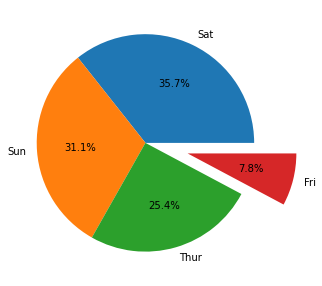

In [38]:
#eploded pie chart
plt.figure(figsize = (10, 5))
plt.pie(tips_data.day.value_counts(), autopct="%.1f%%", radius=1, labels=['Sat', 'Sun', 'Thur', 'Fri'], explode=[0,0,0,0.4])

plt.show()

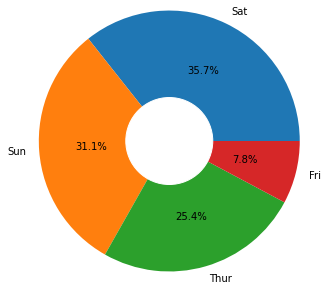

In [39]:
#donut pie plot
plt.pie(tips_data.day.value_counts(), autopct="%.1f%%", radius=1.5, labels=['Sat', 'Sun', 'Thur', 'Fri'])

circle = plt.Circle((0,0), 0.5, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)

plt.show()

## Histogram:

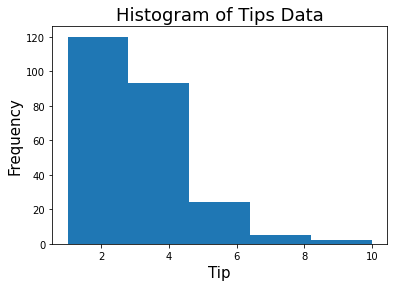

In [40]:
#plot the histogram

#specify the bins(bar) for histogram
plt.hist(tips_data['tip'], bins=5)

#define labels and title
plt.title("Histogram of Tips Data", fontsize = 18)
plt.xlabel("Tip", fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)

plt.show()

## Box Plot:

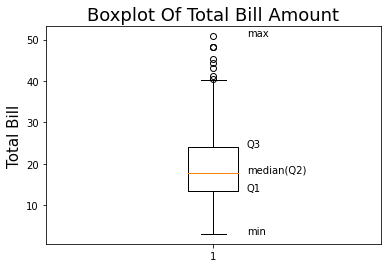

In [41]:
# Box Plot -------->

plt.boxplot(tips_data['total_bill'])

#add labels for five number summary
plt.text(x = 1.1, y=tips_data['total_bill'].min(), s='min')
plt.text(x = 1.1, y=tips_data.total_bill.quantile(0.25), s='Q1')
plt.text(x = 1.1, y=tips_data['total_bill'].median(), s='median(Q2)')
plt.text(x = 1.1, y=tips_data.total_bill.quantile(0.75), s='Q3')
plt.text(x = 1.1, y=tips_data['total_bill'].max(), s='max')

#add the graph title and axes labels
plt.title('Boxplot Of Total Bill Amount', fontsize = 18)
plt.ylabel('Total Bill', fontsize = 15)

plt.show()

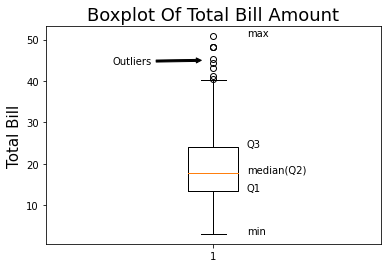

In [42]:
plt.boxplot(tips_data['total_bill'])

#add labels for five number summary
plt.text(x = 1.1, y=tips_data['total_bill'].min(), s='min')
plt.text(x = 1.1, y=tips_data.total_bill.quantile(0.25), s='Q1')
plt.text(x = 1.1, y=tips_data['total_bill'].median(), s='median(Q2)')
plt.text(x = 1.1, y=tips_data.total_bill.quantile(0.75), s='Q3')
plt.text(x = 1.1, y=tips_data['total_bill'].max(), s='max')

#add an arrow(annotate) to show the outliers
plt.annotate('Outliers', xy=(0.97, 45), xytext=(0.7, 44), arrowprops=dict(facecolor="black", arrowstyle="simple"))

#add the graph title and axes labels
plt.title('Boxplot Of Total Bill Amount', fontsize = 18)
plt.ylabel('Total Bill', fontsize = 15)

plt.show()

## Strip Plot:

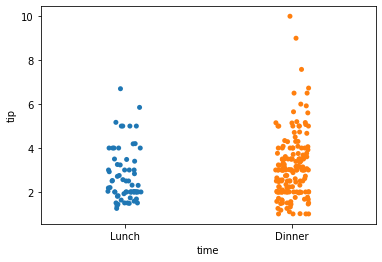

In [43]:
# Strip Plot ------->

sns.stripplot(y = 'tip', x = 'time', data = tips_data)
plt.show()

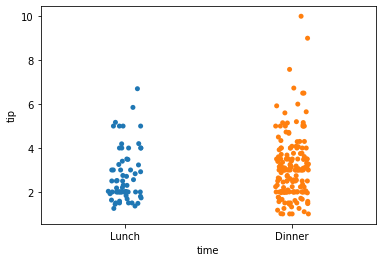

In [44]:
#strip plot with jitter to spread the points
sns.stripplot(y = 'tip', x = 'time', data = tips_data, jitter=True)
plt.show()

## Swarm Plot:

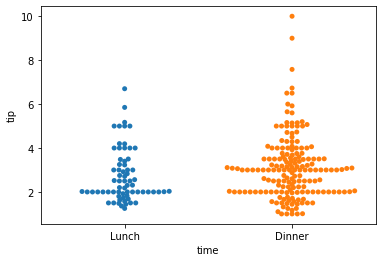

In [45]:
#Swarm Plot----------->

sns.swarmplot(y = 'tip', x = 'time', data = tips_data)
plt.show()

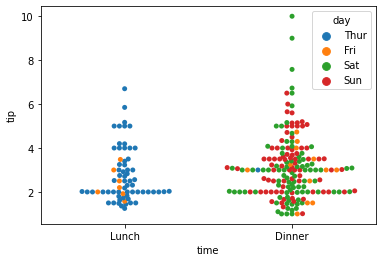

In [46]:
#swarm plot with adding another categorical variable 'day'
sns.swarmplot(y = 'tip', x = 'time', data = tips_data, hue='day')
plt.show()

## Violin Plot:

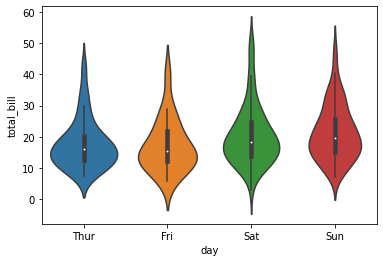

In [47]:
# Violin Plot ----------->

sns.violinplot(y = 'total_bill', x = 'day', data = tips_data)
plt.show()

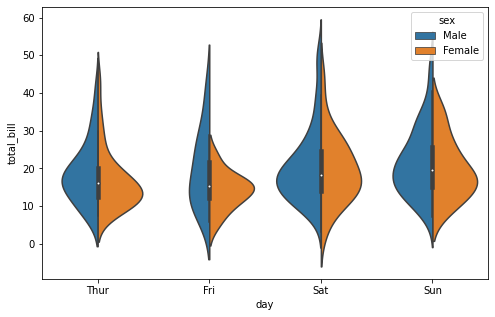

In [48]:
#set the figure size
plt.figure(figsize=(8,5))

#ploting the violin using split-True
sns.violinplot(y = 'total_bill', x = 'day', data = tips_data, hue='sex', split=True)
plt.show()

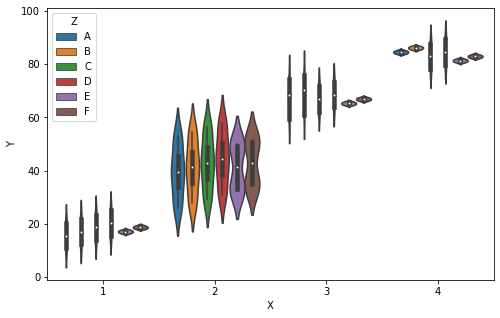

In [49]:
X =[1]*50+[2]*100+[3]*60+[4]*40

Y = np.linspace(10,90,250)

Z = (['A']*5+['B']*5+ ['C']*5+['D']*5+ ['E']*5+['F']*5+['A']*5+['B']*5+ ['C']*5+['D']*5)*5

data = pd.DataFrame({'X':X,'Y':Y,'Z':Z})

#set the figure size
plt.figure(figsize=(8,5))

sns.violinplot(y = 'Y',x='X',data=data,hue = 'Z',split= False)

plt.show()

## Line Plot:

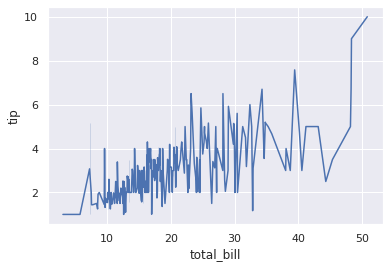

In [50]:
sns.set(style='darkgrid')
sns.lineplot(x='total_bill', y='tip', data=tips_data)

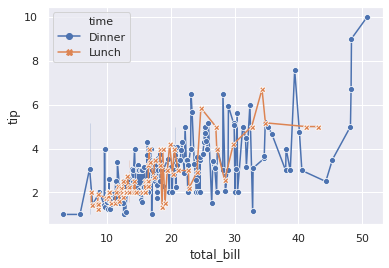

In [51]:
sns.lineplot(x="total_bill", y="tip",
            hue="time", style="time",
            markers=True, dashes=False, data=tips_data)

## Pair Plot:

<Figure size 576x576 with 0 Axes>

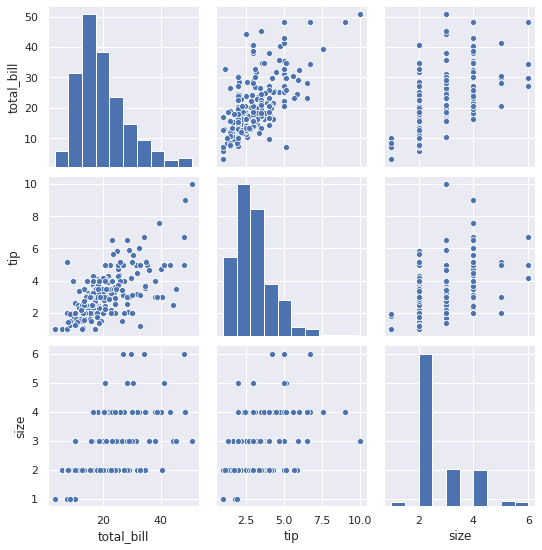

In [52]:
# Pair Plot----------->

plt.figure(figsize=(8,8))
sns.pairplot(tips_data)
plt.show()

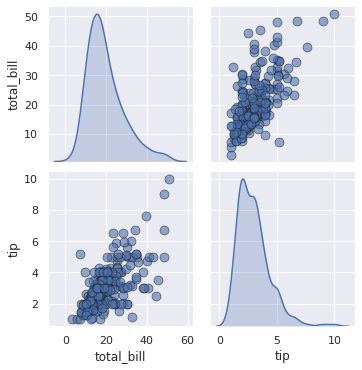

In [53]:
sns.pairplot(tips_data, vars=["total_bill", "tip"], diag_kind="kde",
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

## Distribution Plot:

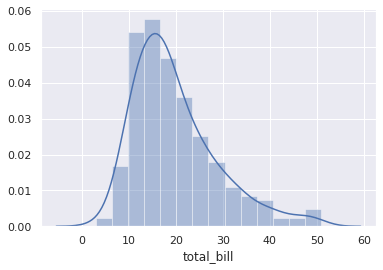

In [54]:
# Distribution Plot -------->
sns.distplot(tips_data['total_bill'])
plt.show()

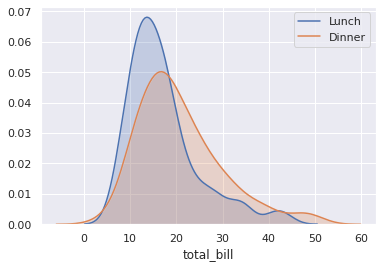

In [55]:
#iterate the distplot() function over the time

#list the time
time = ['Lunch', 'Dinner']

#iterate through time
for i in time:
    subset = tips_data[tips_data['time']==i]
    
#Draw the density plot
#'hist'=False is not plot histogram
#'kde = True' plots density curve
    sns.distplot(subset['total_bill'], hist=False, kde=True,
                kde_kws={'shade':True},
                label=i)

## Count Plot:

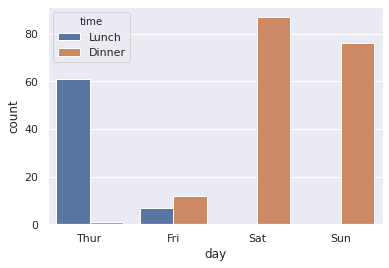

In [56]:
# Count Plot ----------->

#set 'time' as a 'hue' parmeter
sns.countplot(data = tips_data, x = 'day', hue = 'time')
plt.show()

## Heatmap:

In [57]:
# Heat Map----------->

#compute correlation
corr_matrix = tips_data.corr()
corr_matrix

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


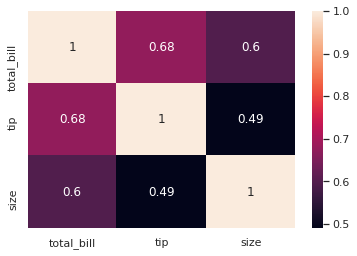

In [58]:
#annot=True return the correlation values
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Thanks .... 

Thank you for taking time to look at my EDA

## Every Feedback is Useful. Feel free to contribute 😃